# Linear Regression 

## import library

In [26]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data 

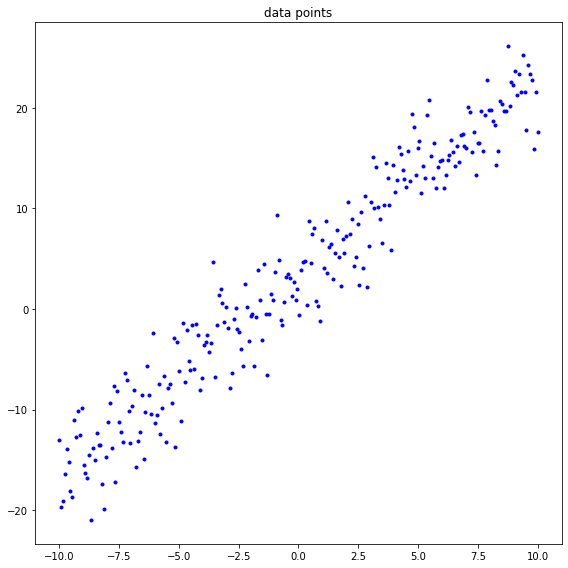

In [27]:
filename    = 'C:/Users/heji0/OneDrive/문서/2021-1/머신러닝/06/assignment_06_data.csv'
data_load   = np.loadtxt(filename, delimiter = ',')

x   = data_load[0, :]
y   = data_load[1, :]

plt.figure(figsize=(8,8))

plt.plot(x, y, '.', color = 'blue')
plt.title('data points')

plt.tight_layout()
plt.show()

## compute the loss function

In [28]:
def compute_loss(x, y, theta0, theta1):
    n = x.size
    loss = 0
    for i in range(0, n):
        loss = loss + (theta0 + theta1*x[i] - y[i])**2
    loss = loss / (2*n)
    return loss

## compute the gradient for each model parameter

In [29]:
def compute_gradient_theta0(x, y, theta0, theta1):
    n = x.size
    dL = 0
    for i in range(0, n):
        dL = dL + 2*theta0 + 2*theta1*x[i] - 2*y[i]
    dL = dL / (2*n)
    return dL

In [30]:
def compute_gradient_theta1(x, y, theta0, theta1):
    n = x.size
    dL = 0
    for i in range(0, n):
        dL = dL + 2*x[i]*x[i]*theta1 + 2*theta0*x[i] - 2*x[i]*y[i]
    dL = dL / (2*n)
    return dL

## gradient descent for each model parameter

In [31]:
num_iteration       = 1000
learning_rate       = 0.01

theta0              = 0
theta1              = 0

theta0_iteration    = np.zeros(num_iteration)
theta1_iteration    = np.zeros(num_iteration)
loss_iteration      = np.zeros(num_iteration)

for i in range(num_iteration):

    theta0  = theta0 - learning_rate*compute_gradient_theta0(x, y, theta0, theta1)
    theta1  = theta1 - learning_rate*compute_gradient_theta1(x, y, theta0, theta1)
    loss    = compute_loss(x, y, theta0, theta1)

    theta0_iteration[i] = theta0
    theta1_iteration[i] = theta1
    loss_iteration[i]   = loss

    print("iteration = %4d, loss = %5.5f" % (i, loss))

2
iteration =  394, loss = 4.53588
iteration =  395, loss = 4.53585
iteration =  396, loss = 4.53581
iteration =  397, loss = 4.53577
iteration =  398, loss = 4.53574
iteration =  399, loss = 4.53570
iteration =  400, loss = 4.53567
iteration =  401, loss = 4.53564
iteration =  402, loss = 4.53561
iteration =  403, loss = 4.53557
iteration =  404, loss = 4.53554
iteration =  405, loss = 4.53551
iteration =  406, loss = 4.53548
iteration =  407, loss = 4.53545
iteration =  408, loss = 4.53543
iteration =  409, loss = 4.53540
iteration =  410, loss = 4.53537
iteration =  411, loss = 4.53534
iteration =  412, loss = 4.53532
iteration =  413, loss = 4.53529
iteration =  414, loss = 4.53527
iteration =  415, loss = 4.53524
iteration =  416, loss = 4.53522
iteration =  417, loss = 4.53519
iteration =  418, loss = 4.53517
iteration =  419, loss = 4.53515
iteration =  420, loss = 4.53512
iteration =  421, loss = 4.53510
iteration =  422, loss = 4.53508
iteration =  423, loss = 4.53506
iteratio

In [32]:
f = theta0 + theta1*x

## plot the results

In [33]:
def plot_data_regression(x, y, f):

    plt.figure(figsize=(8,6))
    plt.title('linear regression result')
    plt.plot(x,f, color='red')  
    plt.plot(x, y, '.', color = 'blue')
    plt.tight_layout()
    plt.show()

In [34]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss curve')
    plt.plot(loss_iteration, '-', color='red')
    
    plt.tight_layout()
    plt.show()

In [35]:
def plot_model_parameter(theta0_iteration, theta1_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    plt.plot(theta0_iteration, '-', color='blue')
    plt.plot(theta1_iteration, '-', color='green')

    plt.tight_layout()
    plt.show()

In [37]:
X0  = np.arange(-10, 10, 0.1)
X1  = np.arange(-10, 10, 0.1)

grid_theta0, grid_theta1 = np.meshgrid(X0,X1)
grid_loss   = compute_loss(x, y, grid_theta0, grid_theta1)

import warnings
warnings.filterwarnings(action='ignore')

def plot_loss_surface(grid_theta0, grid_theta1, grid_loss):
    fig = plt.figure(figsize=(8,8))
    plt.title('loss surface')
    
    ax=fig.add_subplot(111,projection='3d')
    
    ax.plot_surface(grid_theta0, grid_theta1, grid_loss)

    plt.tight_layout()
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point and the regression result in red curve

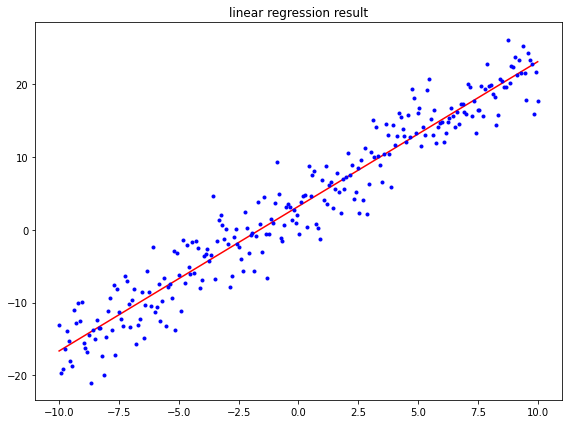

In [38]:
plot_data_regression(x, y, f)

### # 02. plot the values of the model parameters $\theta_0$ in blue curve and $\theta_1$ in green curve over the gradient descent iterations

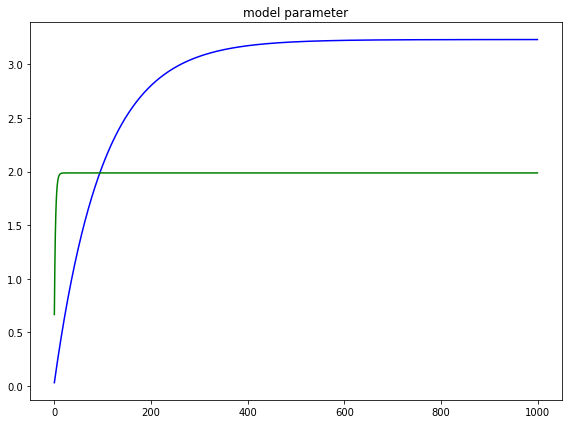

In [39]:
plot_model_parameter(theta0_iteration, theta1_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

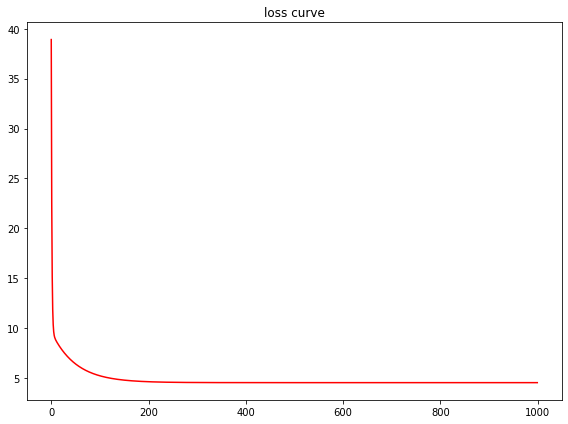

In [40]:
plot_loss_curve(loss_iteration)

### # 04. plot the loss surface in 3-dimension surface where $x$-axis represents $\theta_0$, $y$-axis represents $\theta_1$ and $z$-axis represents $\mathcal{L}$

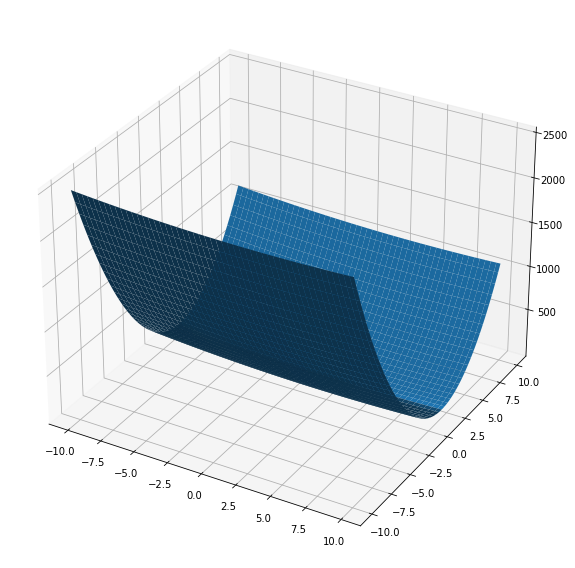

In [41]:
plot_loss_surface(grid_theta0, grid_theta1, grid_loss)